## Группа DS03-onl

Студент Парфимович Алексей

## Домашнее задание №4
Загрузить текст длиной не менее 20000 символов.  
Уменьшить размерность текста, используя метод главных компонент, при этом обеспечить сохранение информации не менее 80%

### Задачи:
- загрузка и токенизация текста
- очистка данных (числа, знаки препинания, символы, стоп-слова)
- лемматизация
- векторизация
- уменьшение размерности методом главных компонент (потери не более 20%)
#### Дополнительно:
- Посчитать результаты обучения (если есть метки классов).
- Построить карту 2D c 10-40 словами что бы посмотреть расположены ли похожие слова рядом или нет 

In [6]:
import spacy
import string

import numpy as np
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt

from langdetect import detect_langs
from collections import Counter

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA


SOURCE_TEXT_PATH = 'text_28000.txt'

Для токинезации текста и выделения отдельных значимых слов выполняется "Лемматизация" текста посредством пакета Spacy   
(выделение и очистка слов с приведением их значимую базовую форму)
  
Для упрощения используется работа только с Английским языком

In [7]:
# Загрузить исходный текст из файла 
with open(SOURCE_TEXT_PATH, 'r') as f:
    text_raw = f.read();

# TODO: отсортировать языки и выбрать основной язык текста 
print(detect_langs(text_raw))
# Для простоты принимаем язык исходного текста - всегда Английский

# Создать объект nlp для обработки текстов на Английском языке (EN)
nlp = spacy.load('en_core_web_sm')

# Выполнить токинезацию исходного текста
doc = nlp(text_raw)

# Выделить список всех предожений исходного документа с лемматизацией отдельных слов 
content = [sentence.lemma_ for sentence in doc.sents]

[en:0.9999969684708916]


Векторизация слов  
Для векторизации спользуется метод TF-IDF (частоты-обратной частоты встречаемости слова в документе)

In [18]:
# Сформировать набор стоп-слов для английского языка
#stop_words = spacy.lang.en.stop_words.STOP_WORDS

vectorizer = TfidfVectorizer(
    lowercase=True,
    stop_words='english'
)

# Выполнить векторизацию слов
X = vectorizer.fit_transform(content)

# Сформировать из полученных векторов датафрейм
# транспонировать его таким образом, что строки(Rows) - это вектора соответствующих слов, состоящих из компонентов
df_tfidf = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names_out()).T

df_tfidf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 719 entries, 20th to young
Columns: 171 entries, 0 to 170
dtypes: float64(171)
memory usage: 966.2+ KB


Построим график совокупной дисперсии этих компонентов, чтобы визуализировать сколько данных сохранит прогноз в зависимости от количества использованных компонент

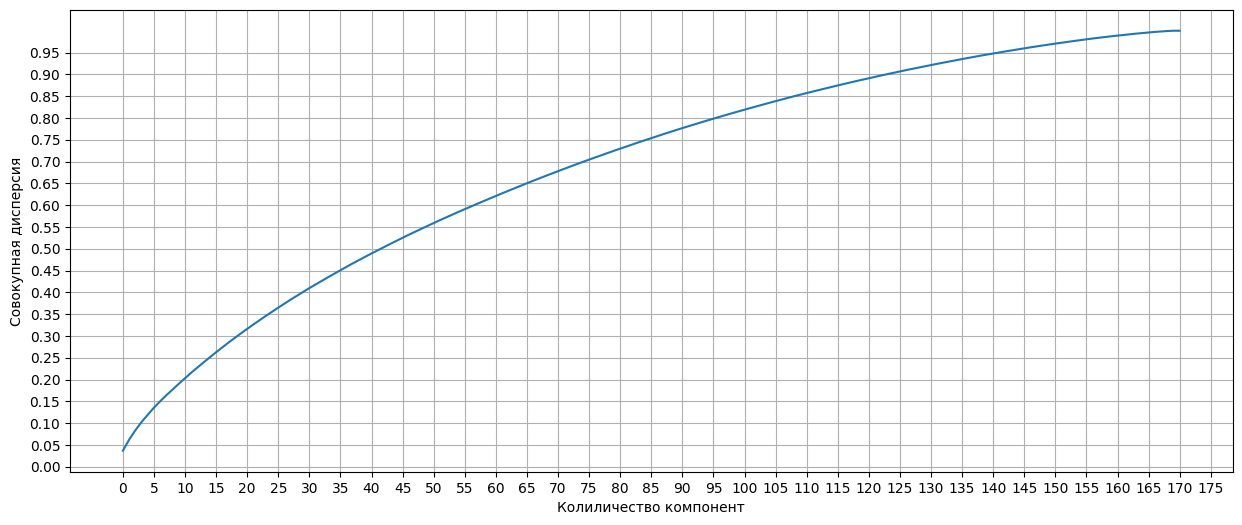

In [20]:
pca = PCA(df_tfidf.shape[1])
pca.fit(df_tfidf)

plt.figure(figsize=(15, 6))
plt.ylabel('Совокупная дисперсия');
plt.xlabel('Колиличество компонент')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.yticks(np.arange(0,1,0.05))
plt.xticks(np.arange(0,180,5))
plt.grid()


Вывод: для сохранения не менее 80% иформации требуется не менее 95 компонент

In [10]:
#pca = PCA(95).fit(df_tfidf)

#transformed = pca.transform(df_tfidf)

#restored = pca.inverse_transform(transformed)